# Problem Statement

Maju Jaya Digital has experienced steady sales growth; however, overall profitability and the sustainability of long-term revenue remain uncertain. Although management has access to raw performance data, decisions are often made without fully leveraging insights from customer behavior, product trends, and regional differences.  

The lack of a data-driven strategy creates several risks:  
- Sales growth may not align with profit growth.  
- Underperforming products or regions could continue draining resources without improvement.  
- Discounts and promotions may not significantly impact sales volume.  
- Opportunities in high-performing segments might be missed, limiting the company’s overall market potential.  

To ensure future growth, Maju Jaya Digital needs to adopt a more systematic approach to analyzing sales, customer behavior, product performance, and regional trends. By addressing targeted business questions, the company can align its marketing, pricing, and operational strategies to maximize profitability, strengthen competitive advantage, and build a sustainable business model.  

---

# Main Business Question

**How can Maju Jaya Digital effectively increase its profit/revenue?**  

---

# Sub-Questions

## 1. Overall Sales & Profit
- What is our overall sales and profit performance?  
- Is revenue growing sustainably over time?  

---

## 2. Customer Behavior
- Which customer segments (by generation, gender, or geography) are the most profitable?  
- How do behaviors differ across these segments?  

---

## 3. Product Performance
- Which products contribute the most to sales and profit?  
- Which products are underperforming or losing money?  

---

## 4. Regional Performance
- Which regions drive the highest sales and profit?  
- Where are we experiencing weak performance that requires attention?  

---

## 5. Seasonality
- During which months or quarters do we see sales peaks or drops?  
- How can we align marketing or inventory to maximize seasonal demand?  

---

## 6. Discount Effectiveness
- Do discounts and promotions effectively increase sales and profit?  
- Or do they instead reduce overall profitability?  

# Import Library


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV File from Google Drive

In [ ]:
# Read sheet 1 for df_sales
sheet_url1 = 'https://docs.google.com/spreadsheets/d/149hwQ5H3xoFJbe3yht5luup9SM-wzzam/edit?gid=1345765640#gid=1345765640'

sheet_url_csv = sheet_url1.replace('/edit?gid=', '/export?format=csv&gid=').replace('/edit#gid=', '/export?format=csv&gid=')

df_sales = pd.read_csv(sheet_url_csv)

# Read sheet 2 for df_customer

sheet_url2 = 'https://docs.google.com/spreadsheets/d/149hwQ5H3xoFJbe3yht5luup9SM-wzzam/edit?gid=1604330357#gid=1604330357'
sheet_url_csv2 = sheet_url2.replace('/edit?gid=', '/export?format=csv&gid=').replace('/edit#gid=', '/export?format=csv&gid=')

df_customer = pd.read_csv(sheet_url_csv2)

# Read sheet 3 for df_product

sheet_url3 = 'https://docs.google.com/spreadsheets/d/149hwQ5H3xoFJbe3yht5luup9SM-wzzam/edit?gid=1648906654#gid=1648906654'
sheet_url_csv3 = sheet_url3.replace('/edit?gid=', '/export?format=csv&gid=').replace('/edit#gid=', '/export?format=csv&gid=')

df_product = pd.read_csv(sheet_url_csv3)

# Column / Feature Information

## 1. Sales DataFrame

| Column            | Description                                                       |
|-------------------|-------------------------------------------------------------------|
| **no_bon**        | Transaction number (unique per purchase)                          |
| **id_pelanggan**  | Customer code                                                     |
| **tanggal_bon**   | Transaction date                                                  |
| **id_produk**     | Product code                                                      |
| **kota**          | City where the transaction took place                             |
| **jumlah_terjual**| Number of units purchased                                         |
| **diskon**        | Discount given (%)                                                |
| **rating**        | Customer rating (scale 1–5)                                       |
| **kepuasan**      | `"complaint"` if rating = 1, otherwise can be empty or *null*     |

---

## 2. Customer DataFrame

| Column             | Description                        |
|--------------------|------------------------------------|
| **id_pelanggan**   | Unique customer ID                 |
| **nama_pelanggan** | Customer name                      |
| **gender**         | Male / Female                      |
| **tanggal_lahir**  | Customer’s date of birth           |

---

## 3. Product DataFrame

| Column            | Description                                             |
|-------------------|---------------------------------------------------------|
| **id_produk**     | Unique product ID                                       |
| **harga_satuan**  | Product selling price (per unit)                        |
| **modal**         | Product cost price                                      |
| **jenis_barang**  | Product category: Mouse, Monitor, etc.                  |
| **merek_barang**  | Product brand                                           |
| **tipe**          | Product type/model from the brand                       |

---

## 4. Feature Engineering

| Column              | Description                                                    |
|---------------------|----------------------------------------------------------------|
| **generasi**        | Customer generation category (Gen Z, Millennial, Gen X, etc.)  |
| **profit_per_item** | Profit per product item                                        |
| **total_profit**    | Total profit per transaction                                   |
| **total_revenue**   | Total revenue per transaction                                  |


# DF Information

In [ ]:
df_sales.info()
df_customer.info()
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9022 entries, 0 to 9021
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no_bon          8862 non-null   object
 1   id_pelanggan    8864 non-null   object
 2   tanggal_bon     9016 non-null   object
 3   kota            8872 non-null   object
 4   id_produk       8868 non-null   object
 5   jumlah_terjual  9022 non-null   int64 
 6   diskon          9022 non-null   int64 
 7   rating          9022 non-null   int64 
 8   Komplain        9022 non-null   object
dtypes: int64(3), object(6)
memory usage: 634.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_pelanggan    2000 non-null   object
 1   nama_pelanggan  2000 non-null   object
 2   gender          2000 non-null   object
 3   tanggal_lahir   2000 non-nu

# Join 3 DF into 1 DF

1. Check maching features of all DF
2. Merge:

- df_sales(id_pelanggan) = df_customer(id_pelanggan)

- df_sales(id_produk) = df_product(id_produk)    

In [ ]:
# df_sales(id_pelanggan) = df_customer(id_pelanggan)

df_join1 = df_sales.merge(df_customer, on='id_pelanggan', how='left')

In [ ]:
# df_sales(id_produk) = df_product(id_produk)

df = df_join1.merge(df_product, on='id_produk', how='left')

# Check data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9022 entries, 0 to 9021
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   no_bon          8862 non-null   object 
 1   id_pelanggan    8864 non-null   object 
 2   tanggal_bon     9016 non-null   object 
 3   kota            8872 non-null   object 
 4   id_produk       8868 non-null   object 
 5   jumlah_terjual  9022 non-null   int64  
 6   diskon          9022 non-null   int64  
 7   rating          9022 non-null   int64  
 8   Komplain        9022 non-null   object 
 9   nama_pelanggan  8864 non-null   object 
 10  gender          8864 non-null   object 
 11  tanggal_lahir   8864 non-null   object 
 12  jenis_barang    8868 non-null   object 
 13  merek_barang    8868 non-null   object 
 14  harga_satuan    8868 non-null   float64
 15  modal           8868 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 1.1+ MB


# Data Cleansing

## Cek missing value

In [ ]:
# Check Missing Value

df_dc = df.copy()
df_dc.isnull().sum()

,0
no_bon,160
id_pelanggan,158
tanggal_bon,6
kota,150
id_produk,154
jumlah_terjual,0
diskon,0
rating,0
Komplain,0
nama_pelanggan,158


## Cek Outlier

In [ ]:
df_numerik = df_dc.select_dtypes(include=['number'])

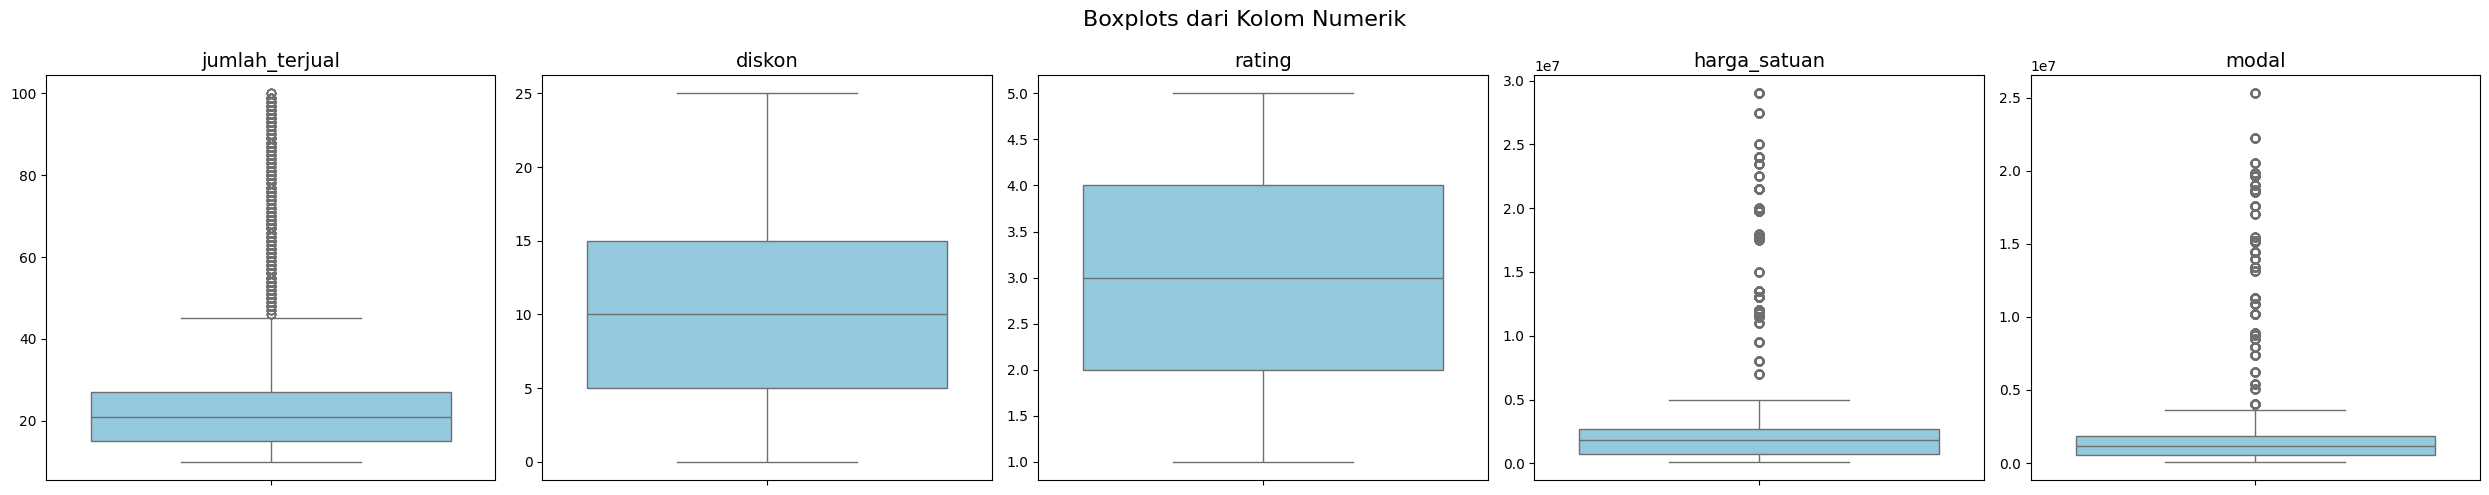

In [ ]:
columns = df_numerik.columns
n_cols = len(columns)

# boxplot placed all in 1 row
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(5 * n_cols, 5))

# loop boxplot
for i, col in enumerate(columns):
    sns.boxplot(y=df_numerik[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col}', fontsize=14)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

plt.suptitle('Boxplots dari Kolom Numerik', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Space untuk subtitle
plt.show()

## Check for duplicates

Duplicates are checked based on no_bon (unique value)

In [ ]:
df['no_bon'].duplicated().sum()

np.int64(167)

## Cleansing Handling

Missing Values
---
1. Found 158 rows in the columns `id_pelanggan`, `nama_pelanggan`, and `gender` that contain null values.  
2. Found 154 rows in the columns `id_produk`, `jenis_barang`, `merek_barang`, `harga_satuan`, and `modal` that contain null values.  
3. Found 160 rows in the column `no_bon` that contain null values.  
4. Found 150 rows in the column `kota` that contain null values.  

**Handling:**  
- `no_bon` will be imputed starting from 10000 because it was found that the missing `no_bon` starts around ~9999.  
- All rows with missing values in columns other than `no_bon` will be dropped because those columns hold essential information about the sales transaction. Without this information, no meaningful insight can be derived from the row. If imputed, those rows would introduce bias, leading to skewed analysis.  

---

Outliers
---

1. All numeric columns contain outliers except for `diskon` and `rating`.  

**Handling:**  
- Even though many columns contain outlier values, these outliers will not be removed. Outliers in sales data are very normal; there will always be products with superior performance, much higher prices than others, and costs significantly more expensive compared to other items.  

---

Duplicates
---

1. Duplicates will be checked based on the `no_bon` column. In this dataset, `no_bon` is a unique value and should not have duplicates.  

**Handling:**  
- If duplicate `no_bon` values are found but with different values in certain columns, the `rating` column will determine which `no_bon` entry to delete. If two entries with the same `no_bon` exist, the one with the higher rating will be deleted. This method is based on customer behavior, where feedback is typically expressed through lower ratings.  

---

Data Type Errors
---

1. The columns `tanggal_lahir` and `tanggal_bon` are in integer format.  

**Handling:**  
- These two columns will be converted into datetime format.  


## Imputation

### Sort no_bon ascending

In [ ]:
df_dc = df_dc.sort_values(by=['no_bon'], ascending=[True])

In [ ]:
df_dc.isnull().sum()

,0
no_bon,160
id_pelanggan,158
tanggal_bon,6
kota,150
id_produk,154
jumlah_terjual,0
diskon,0
rating,0
Komplain,0
nama_pelanggan,158


### Check amount of null in no_bon

In [ ]:
missing_count = df_dc['no_bon'].isnull().sum()
missing_count

np.int64(160)

### Generate no_bon starting from 10000

In [ ]:
missing_indices = df_dc[df_dc['no_bon'].isnull()].index
start_number = 10000
synthetic_bons = [f'BON{10000 + i:05d}' for i in range(len(missing_indices))]

### Fill missing value in no_bon with synthetic no_bon

In [ ]:
df_dc.loc[df_dc['no_bon'].isnull(), 'no_bon'] = synthetic_bons

In [ ]:
# cek no_bon yang missing
df_dc['no_bon'].isnull().sum()

np.int64(0)

## Duplicates

### Create a duplicate DataFrame based on `no_bon` to check if there are columns with different values

In [ ]:
df_non_null = df_dc[df_dc['no_bon'].notnull()]
df_duplikat_semua = df_non_null[df_non_null['no_bon'].duplicated(keep=False)]
df_duplikat_semua.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 4953 to 17
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   no_bon          18 non-null     object 
 1   id_pelanggan    18 non-null     object 
 2   tanggal_bon     18 non-null     object 
 3   kota            18 non-null     object 
 4   id_produk       18 non-null     object 
 5   jumlah_terjual  18 non-null     int64  
 6   diskon          18 non-null     int64  
 7   rating          18 non-null     int64  
 8   Komplain        18 non-null     object 
 9   nama_pelanggan  18 non-null     object 
 10  gender          18 non-null     object 
 11  tanggal_lahir   18 non-null     object 
 12  jenis_barang    18 non-null     object 
 13  merek_barang    18 non-null     object 
 14  harga_satuan    18 non-null     float64
 15  modal           18 non-null     float64
dtypes: float64(2), int64(3), object(11)
memory usage: 2.4+ KB


In [ ]:
df_duplikat_semua.head(20)

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain,nama_pelanggan,gender,tanggal_lahir,jenis_barang,merek_barang,harga_satuan,modal
4953,BON01812,PEL01815,6/11/2023,Depok,PRD00020,29,15,1,yes,Agus CXV,L,12/8/1975,Keyboard,Samsung,600000.0,501505.0
4944,BON01812,PEL01815,6/11/2023,Depok,PRD00020,29,15,4,no,Agus CXV,L,12/8/1975,Keyboard,Samsung,600000.0,501505.0
1709,BON01818,PEL00792,10/27/2021,Bogor,PRD00025,13,0,1,yes,Budi WQS,L,6/24/1983,Keyboard,Panasonic,400000.0,287728.0
1714,BON01818,PEL00792,10/27/2021,Bogor,PRD00025,13,0,5,no,Budi WQS,L,6/24/1983,Keyboard,Panasonic,400000.0,287728.0
2243,BON03432,PEL01771,2/3/2022,Bandung,PRD00025,17,15,2,no,Tina EVC,P,10/14/1984,Keyboard,Panasonic,400000.0,287728.0
2237,BON03432,PEL01771,2/3/2022,Bandung,PRD00025,17,15,3,no,Tina EVC,P,10/14/1984,Keyboard,Panasonic,400000.0,287728.0
2045,BON04188,PEL01506,12/25/2021,Jakarta,PRD00029,77,25,2,no,Agus WFE,L,4/13/1994,Printer,Brother,900000.0,607976.0
2042,BON04188,PEL01506,12/25/2021,Jakarta,PRD00029,77,25,3,no,Agus WFE,L,4/13/1994,Printer,Brother,900000.0,607976.0
7180,BON04253,PEL01943,7/19/2024,Jakarta,PRD00067,27,0,4,no,Lia JIZ,P,6/4/1999,PC Rakitan,MJ013,24000000.0,20554678.0
7182,BON04253,PEL01943,7/19/2024,Jakarta,PRD00067,27,0,1,yes,Lia JIZ,P,6/4/1999,PC Rakitan,MJ013,24000000.0,20554678.0


### Sort ascending of no_bon then rating

In [ ]:
df_dc = df_dc.sort_values(by=['no_bon', 'rating'], ascending=[True, True])

In [ ]:
df_dc['no_bon'].duplicated().sum()

np.int64(9)

### Instruction
Delete duplicate `no_bon` where the rating of the `no_bon` is smaller.


In [ ]:
df_dc = df_dc.drop_duplicates(subset=['no_bon'], keep='first')

In [ ]:
df_dc.duplicated(subset=['no_bon']).sum()

np.int64(0)

## Change data type

### Change tanggal_bon to datetime

In [ ]:
df_dc['tanggal_bon'] = pd.to_datetime(df_dc['tanggal_bon'], errors='coerce')
df_dc['tanggal_bon']

,tanggal_bon
6941,2024-06-10
7668,2024-10-21
834,2021-05-23
1674,2021-10-23
5743,2023-11-10
...,...
8889,2025-06-04
8917,2025-06-09
8930,2025-06-10
8959,2025-06-16


### Change `tanggal_lahir` to datetime.


In [ ]:
df_dc['tanggal_lahir'] = pd.to_datetime(df_dc['tanggal_lahir'], errors='coerce')

df_dc.isnull().sum()

,0
no_bon,0
id_pelanggan,158
tanggal_bon,6
kota,150
id_produk,154
jumlah_terjual,0
diskon,0
rating,0
Komplain,0
nama_pelanggan,158


## Delete Null values

In [ ]:
df_dc = df_dc.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9022 entries, 0 to 9021
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   no_bon          8862 non-null   object 
 1   id_pelanggan    8864 non-null   object 
 2   tanggal_bon     9016 non-null   object 
 3   kota            8872 non-null   object 
 4   id_produk       8868 non-null   object 
 5   jumlah_terjual  9022 non-null   int64  
 6   diskon          9022 non-null   int64  
 7   rating          9022 non-null   int64  
 8   Komplain        9022 non-null   object 
 9   nama_pelanggan  8864 non-null   object 
 10  gender          8864 non-null   object 
 11  tanggal_lahir   8864 non-null   object 
 12  jenis_barang    8868 non-null   object 
 13  merek_barang    8868 non-null   object 
 14  harga_satuan    8868 non-null   float64
 15  modal           8868 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 1.1+ MB


In [ ]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 6941 to 9000
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   no_bon          8552 non-null   object        
 1   id_pelanggan    8552 non-null   object        
 2   tanggal_bon     8552 non-null   datetime64[ns]
 3   kota            8552 non-null   object        
 4   id_produk       8552 non-null   object        
 5   jumlah_terjual  8552 non-null   int64         
 6   diskon          8552 non-null   int64         
 7   rating          8552 non-null   int64         
 8   Komplain        8552 non-null   object        
 9   nama_pelanggan  8552 non-null   object        
 10  gender          8552 non-null   object        
 11  tanggal_lahir   8552 non-null   datetime64[ns]
 12  jenis_barang    8552 non-null   object        
 13  merek_barang    8552 non-null   object        
 14  harga_satuan    8552 non-null   float64       
 15  modal 

In [ ]:
len(df) - len(df_dc)

470

In [ ]:
(len(df) - len(df_dc)) / len(df) * 100

5.209487918421636

## Cleansing Documentation

Missing value
---

1. The initial dataframe showed 9,022 rows. After the cleansing process, about 470 rows (approximately 5.2%) were removed. This figure is still considered low, so this handling method is deemed successful.

---

Duplicate
---

1. In the dataframe containing only duplicate `no_bon`, differences were found in the `review` and `complaint` columns. According to the handling method described in the 'Cleansing Handling' section, the `no_bon` that will be deleted is the one with the higher rating. About 9 duplicate `no_bon` rows were deleted using this method.


In [ ]:
df_dc.head()

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain,nama_pelanggan,gender,tanggal_lahir,jenis_barang,merek_barang,harga_satuan,modal
6941,BON00001,PEL01266,2024-06-10,Bogor,PRD00050,29,0,5,no,Agus DDD,L,1982-03-22,Laptop,MSI,19750000.0,17633164.0
7668,BON00002,PEL00591,2024-10-21,Tangerang,PRD00009,30,5,3,no,Tina JQQ,P,1998-11-26,Monitor,Samsung,1600000.0,1139107.0
834,BON00003,PEL01531,2021-05-23,Depok,PRD00030,29,10,3,no,Sari XNX,P,2002-03-25,Printer,Samsung,2700000.0,1800182.0
1674,BON00004,PEL00914,2021-10-23,Bekasi,PRD00031,20,0,4,no,Tina DZU,P,1993-12-18,Printer,Xerox,2700000.0,1999288.0
5743,BON00005,PEL01554,2023-11-10,Jakarta,PRD00023,15,0,4,no,Tina LWC,P,1991-03-09,Keyboard,Ricoh,450000.0,375091.0


# Feature Engineering

## Add 'generation' column for customer demographic analysis

In [ ]:
# Create a new column so it can be categorized by year only
df_dc['tahun_lahir'] = df_dc['tanggal_lahir'].dt.year

# Function for changing category
def tentukan_generasi(tahun_lahir):
    if 1995 <= tahun_lahir <= 2009:
        return 'Gen Z'
    elif 1980 <= tahun_lahir <= 1994:
        return 'Milenial'
    elif 1964 <= tahun_lahir <= 1979:
        return 'Gen X'
    else:
        return 'Lainnya'

# apply function to 'generasi'
df_dc['generasi'] = df_dc['tahun_lahir'].apply(tentukan_generasi)

## Add 'profit_per_item' column for analysis

In [ ]:
df_dc['profit_per_item'] = df_dc['harga_satuan'] - df_dc['modal']

## Add 'total_profit' column for analysis

In [ ]:
df_dc['total_profit'] = df_dc['profit_per_item'] * df_dc['jumlah_terjual']

## Add 'total_revenue' column for analysis

In [ ]:
df_dc['total_revenue'] = df_dc['harga_satuan'] * df_dc['jumlah_terjual']

In [ ]:
df_dc.head()

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain,nama_pelanggan,...,tanggal_lahir,jenis_barang,merek_barang,harga_satuan,modal,tahun_lahir,generasi,profit_per_item,total_profit,total_revenue
6941,BON00001,PEL01266,2024-06-10,Bogor,PRD00050,29,0,5,no,Agus DDD,...,1982-03-22,Laptop,MSI,19750000.0,17633164.0,1982,Milenial,2116836.0,61388244.0,572750000.0
7668,BON00002,PEL00591,2024-10-21,Tangerang,PRD00009,30,5,3,no,Tina JQQ,...,1998-11-26,Monitor,Samsung,1600000.0,1139107.0,1998,Gen Z,460893.0,13826790.0,48000000.0
834,BON00003,PEL01531,2021-05-23,Depok,PRD00030,29,10,3,no,Sari XNX,...,2002-03-25,Printer,Samsung,2700000.0,1800182.0,2002,Gen Z,899818.0,26094722.0,78300000.0
1674,BON00004,PEL00914,2021-10-23,Bekasi,PRD00031,20,0,4,no,Tina DZU,...,1993-12-18,Printer,Xerox,2700000.0,1999288.0,1993,Milenial,700712.0,14014240.0,54000000.0
5743,BON00005,PEL01554,2023-11-10,Jakarta,PRD00023,15,0,4,no,Tina LWC,...,1991-03-09,Keyboard,Ricoh,450000.0,375091.0,1991,Milenial,74909.0,1123635.0,6750000.0


In [ ]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 6941 to 9000
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   no_bon           8552 non-null   object        
 1   id_pelanggan     8552 non-null   object        
 2   tanggal_bon      8552 non-null   datetime64[ns]
 3   kota             8552 non-null   object        
 4   id_produk        8552 non-null   object        
 5   jumlah_terjual   8552 non-null   int64         
 6   diskon           8552 non-null   int64         
 7   rating           8552 non-null   int64         
 8   Komplain         8552 non-null   object        
 9   nama_pelanggan   8552 non-null   object        
 10  gender           8552 non-null   object        
 11  tanggal_lahir    8552 non-null   datetime64[ns]
 12  jenis_barang     8552 non-null   object        
 13  merek_barang     8552 non-null   object        
 14  harga_satuan     8552 non-null   float64  

# Overal Sales & Profit

## Sales and Profit Trends by Year
To analyze overall sales and profit, the data is grouped by year to provide a clear picture of the development of revenue and profit over time. This is important to identify whether there is sustainable growth or fluctuations that need attention.

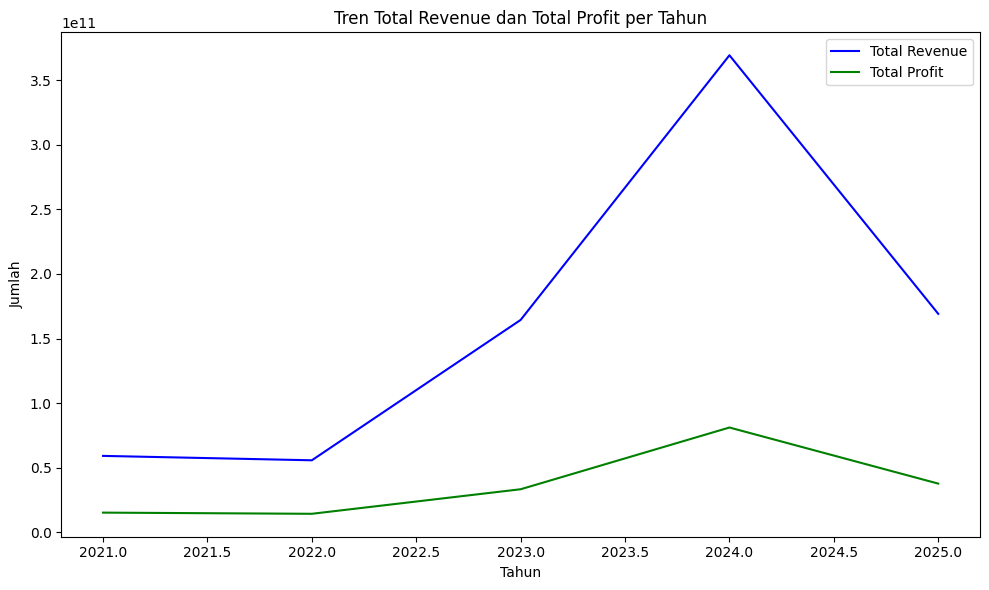

In [ ]:
# Change 'tanggal_bon' to only year
df_dc['tahun'] = df_dc['tanggal_bon'].dt.year
yearly_sales_profit = df_dc.groupby('tahun')[['total_revenue', 'total_profit']].sum().reset_index()

# Visualize total_revenue dan total_profit per year
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales_profit, x='tahun', y='total_revenue', label='Total Revenue', color='blue')
sns.lineplot(data=yearly_sales_profit, x='tahun', y='total_profit', label='Total Profit', color='green')
plt.title('Tren Total Revenue dan Total Profit per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.legend()
plt.tight_layout()
plt.show()

**Insight:**
- Total revenue (blue line) began to experience a sharp surge in 2023, peaking in early 2024 at a much higher level compared to previous years.  
- After the surge, total revenue showed a significant decline in mid-2024.  
- Total profit (green line) moved more steadily compared to total revenue. Although revenue spiked, profit increased at a smaller rate and did not match the scale of the sales growth.  

## Profit Comparison per Product
Next, profit per item analysis is carried out to identify products with the highest profit margins. In this way, it can be seen which products make the greatest contribution to profit and which ones should receive more attention.


/tmp/ipython-input-2187466880.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_profit, x='jenis_barang', y='profit_per_item', palette='coolwarm')


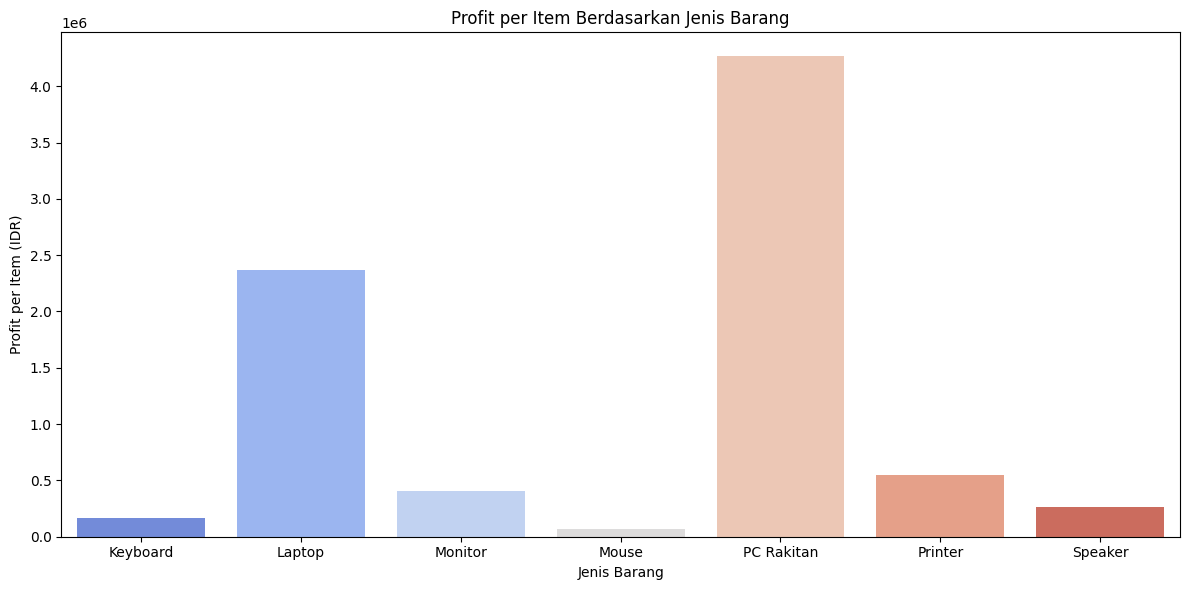

In [ ]:
# Calculate profit per item based on unit price and cost
df_dc['profit_per_item'] = df_dc['harga_satuan'] - df_dc['modal']

# Group data by `jenis_barang` to view profit per item
product_profit = df_dc.groupby('jenis_barang')['profit_per_item'].mean().reset_index()

# Visualization of profit per item by product type
plt.figure(figsize=(12, 6))
sns.barplot(data=product_profit, x='jenis_barang', y='profit_per_item', palette='coolwarm')
plt.title('Profit per Item Berdasarkan Jenis Barang')
plt.xlabel('Jenis Barang')
plt.ylabel('Profit per Item (IDR)')
plt.tight_layout()
plt.show()

**Insight:**
- Custom PCs have a much higher profit per item compared to other products.  
- Laptops also provide relatively high profit per item, although not as high as Custom PCs.  
- Products such as Keyboards, Monitors, Mice, Printers, and Speakers have much lower profit per item.  

## Effect of Discounts on Revenue and Profit
The impact of discounts on sales and profitability was tested by grouping the data based on the level of discount given. Discounts can indeed increase sales volume, but the analysis revealed that larger discounts actually reduced profitability. This indicates that discount strategies need to be carefully considered so as not to harm profit margins.

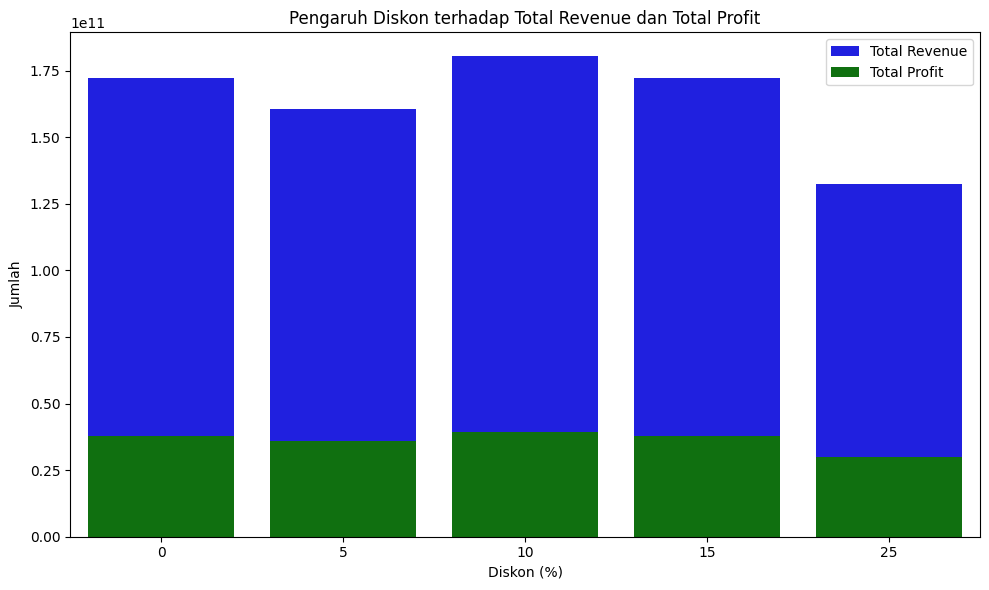

In [ ]:
# Group data by discount to view total revenue and total profit
discount_analysis = df_dc.groupby('diskon')[['total_revenue', 'total_profit']].sum().reset_index()

# Visualization of total revenue and total profit based on discount
plt.figure(figsize=(10, 6))
sns.barplot(data=discount_analysis, x='diskon', y='total_revenue', color='blue', label='Total Revenue')
sns.barplot(data=discount_analysis, x='diskon', y='total_profit', color='green', label='Total Profit')
plt.title('Pengaruh Diskon terhadap Total Revenue dan Total Profit')
plt.xlabel('Diskon (%)')
plt.ylabel('Jumlah')
plt.legend()
plt.tight_layout()
plt.show()

**Insight:**
- Higher discounts do not increase total revenue and reduce profitability due to smaller profit margins.

## Sales and Profit Comparison by City
The analysis by city was carried out to identify the regions that contribute the most to total revenue and profit. This also provides an overview of areas with lower performance, which may require more attention.

/tmp/ipython-input-456090518.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_sales_profit, x='kota', y='total_revenue', palette='Blues_d')


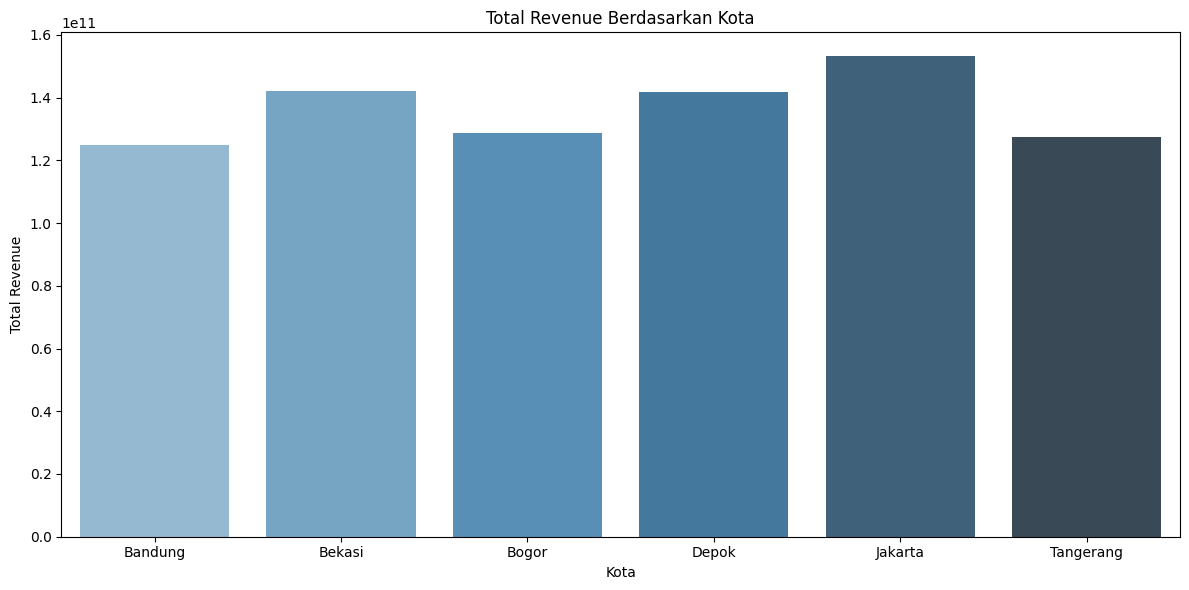

/tmp/ipython-input-456090518.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_sales_profit, x='kota', y='total_profit', palette='Greens_d')


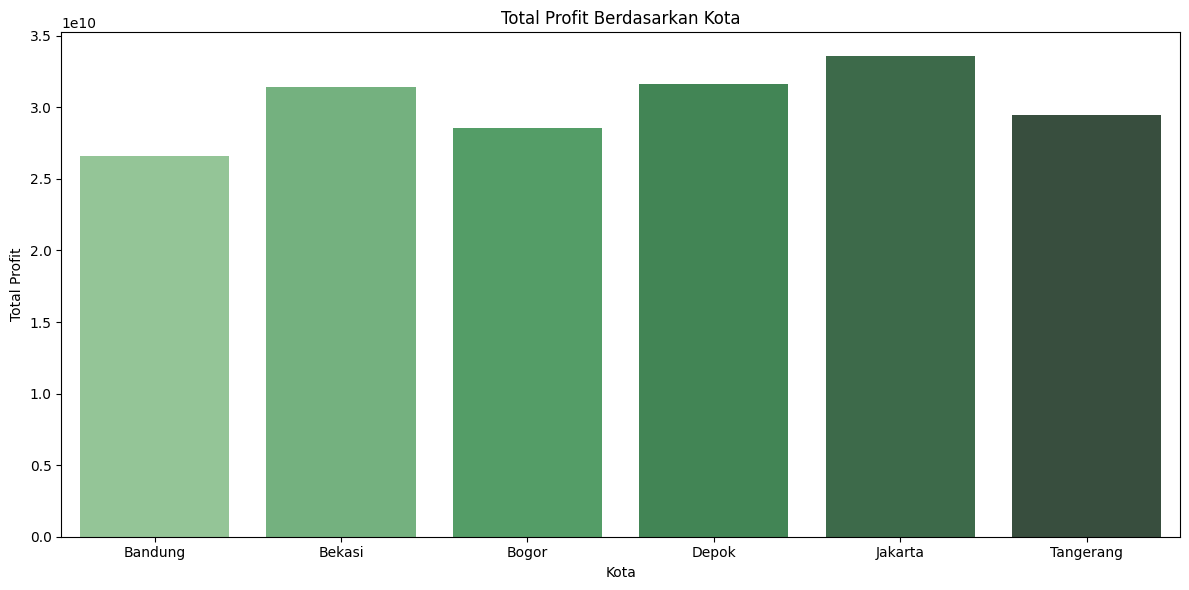

In [ ]:
# Mengelompokkan data berdasarkan kota untuk melihat total revenue dan total profit
city_sales_profit = df_dc.groupby('kota')[['total_revenue', 'total_profit']].sum().reset_index()

# Visualisasi total revenue dan total profit berdasarkan kota
plt.figure(figsize=(12, 6))
sns.barplot(data=city_sales_profit, x='kota', y='total_revenue', palette='Blues_d')
plt.title('Total Revenue Berdasarkan Kota')
plt.xlabel('Kota')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# Visualisasi total profit berdasarkan kota
plt.figure(figsize=(12, 6))
sns.barplot(data=city_sales_profit, x='kota', y='total_profit', palette='Greens_d')
plt.title('Total Profit Berdasarkan Kota')
plt.xlabel('Kota')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

**Insight:**
- Jakarta memiliki total revenue dan total profit yang paling tinggi dibandingkan kota lainnya
- Depok dan Bekasi menunjukkan penjualan dan profit yang stabil dan cukup tinggi
- Tangerang dan Bogor menunjukkan hasil yang lebih rendah dalam hal revenue dan profit
- Bandung memiliki total revenue dan porfit paling rendah

# Customer Behaviour

## Purchasing Behavior by Gender and Product Type
Purchasing behavior by gender was analyzed to understand the product preferences of men and women.

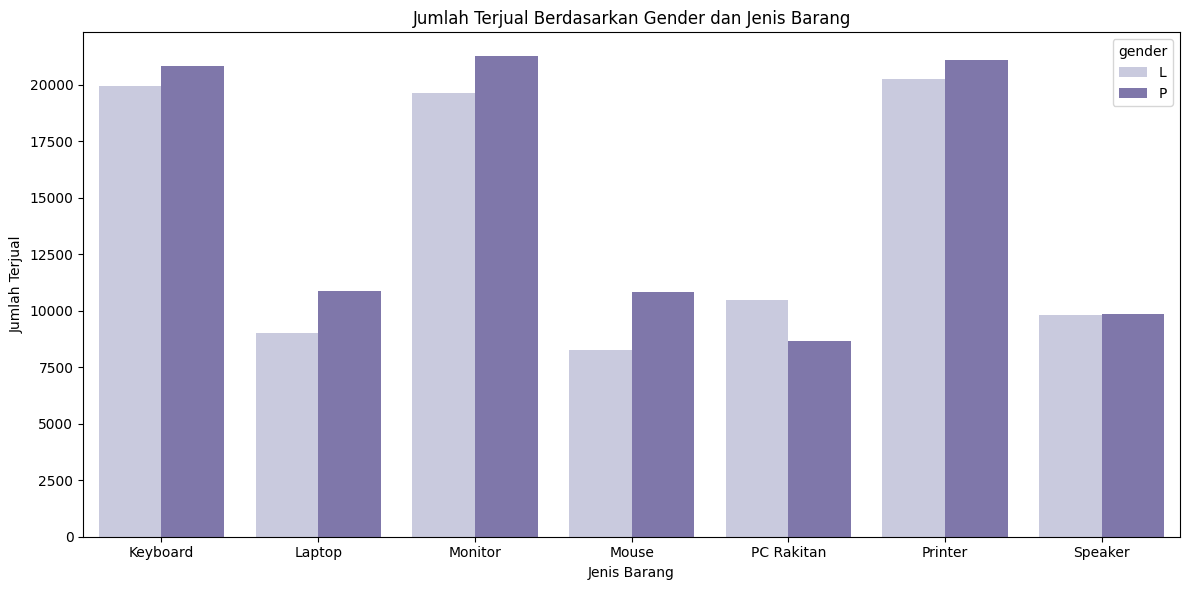

In [ ]:
# Group data by gender and product type to view quantity sold
gender_product_sales = df_dc.groupby(['gender', 'jenis_barang'])['jumlah_terjual'].sum().reset_index()

# Visualization of quantity sold by gender and product type
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_product_sales, x='jenis_barang', y='jumlah_terjual', hue='gender', palette='Purples')
plt.title('Jumlah Terjual Berdasarkan Gender dan Jenis Barang')
plt.xlabel('Jenis Barang')
plt.ylabel('Jumlah Terjual')
plt.tight_layout()
plt.show()

**Insight:**
- Women (P) tend to purchase more products such as Keyboards, Laptops, Monitors, Mice, Speakers, and Printers compared to men. This indicates that these products may be more appealing to women, either due to needs or personal preferences.  
- Custom PCs, despite having lower sales volume, still make a significant contribution in the male segment.  

## Purchasing Behavior by Generation and Product Type

To gain deeper insights into product preferences across different age groups, an analysis of purchasing behavior based on generation has been conducted.

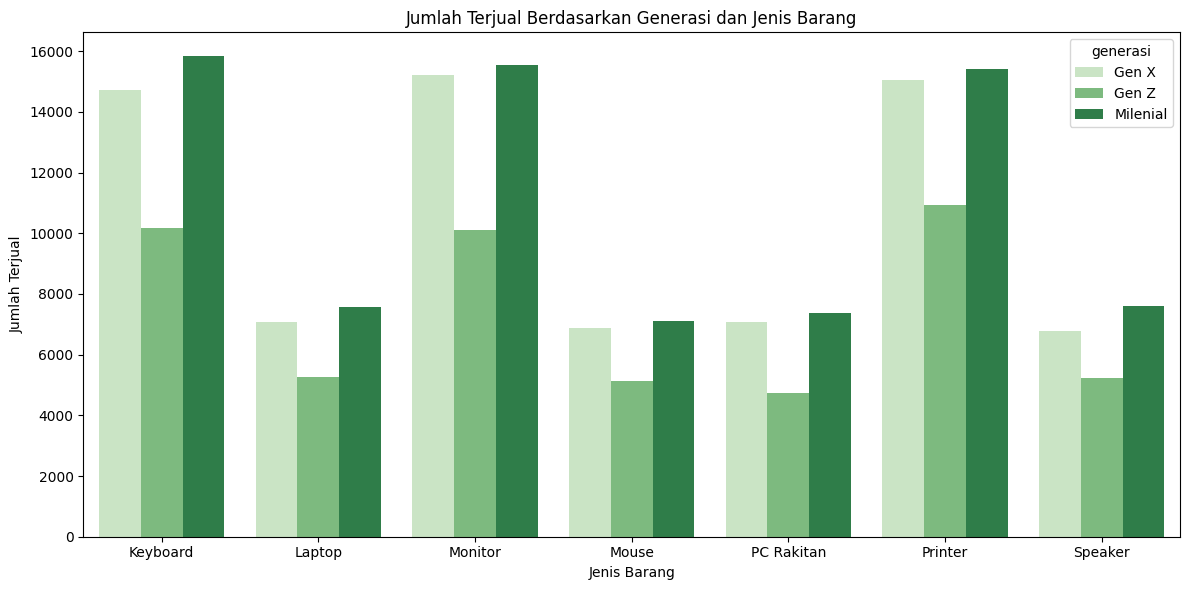

In [ ]:
# Grouping Data by Generation and Product Type to Analyze Sales Volume
generation_product_sales = df_dc.groupby(['generasi', 'jenis_barang'])['jumlah_terjual'].sum().reset_index()

# Visualization of Sales Volume by Generation and Product Type
plt.figure(figsize=(12, 6))
sns.barplot(data=generation_product_sales, x='jenis_barang', y='jumlah_terjual', hue='generasi', palette='Greens')
plt.title('Jumlah Terjual Berdasarkan Generasi dan Jenis Barang')
plt.xlabel('Jenis Barang')
plt.ylabel('Jumlah Terjual')
plt.tight_layout()
plt.show()

**Insight:**
- Millennials (the younger generation) tend to purchase products in higher quantities compared to Gen Z and Gen X.  
- Gen X follows behind with higher sales than Gen Z.  
- Gen Z shows lower sales compared to the other two generations, which may reflect different preferences or needs.  

## Purchasing Behavior Based on Discounts and Unit Price

This analysis examines how discounts and unit price affect the quantity of products sold.

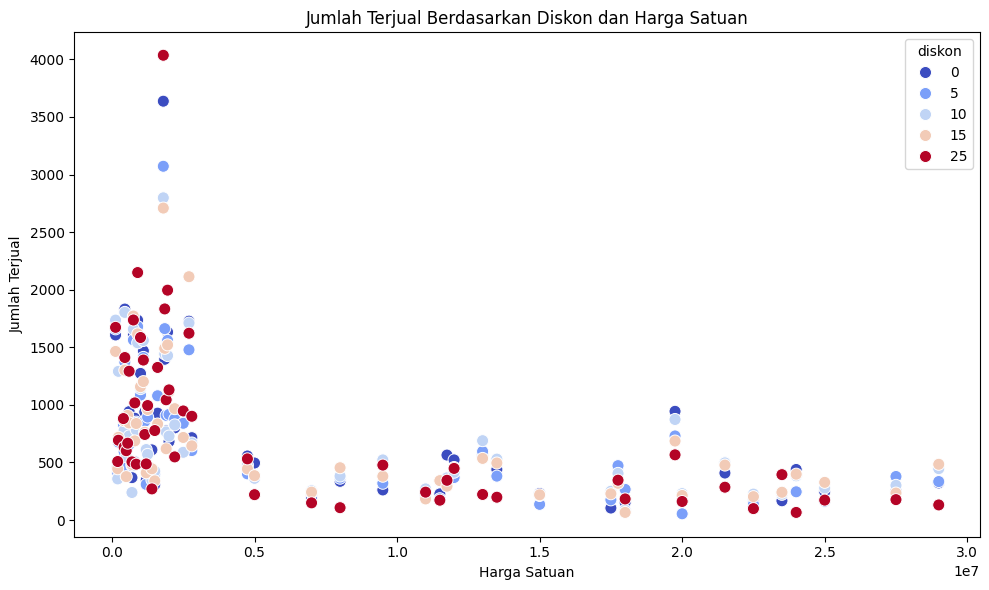

In [ ]:
# Grouping Data by Discounts and Unit Price to Analyze Their Impact on Sales Volume
discount_price_sales = df_dc.groupby(['diskon', 'harga_satuan'])['jumlah_terjual'].sum().reset_index()

# Visualization of Sales Volume by Discounts and Unit Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=discount_price_sales, x='harga_satuan', y='jumlah_terjual', hue='diskon', palette='coolwarm', s=75)
plt.title('Jumlah Terjual Berdasarkan Diskon dan Harga Satuan')
plt.xlabel('Harga Satuan')
plt.ylabel('Jumlah Terjual')
plt.tight_layout()
plt.show()

**Insight:**
- Products with lower unit prices (below 500k) show higher sales when discounts are applied.  
- Products with higher unit prices (above 500k) indicate that larger discounts (15% or 25%) do not always lead to increased sales, as the prices remain too high for those products. Thus, even with discounts, demand is still limited due to customers’ purchasing power constraints.  

## Purchasing Behavior Based on Complaints and Ratings

To gain deeper insights into the impact of customer feedback on sales, an analysis of product complaints and ratings was conducted.

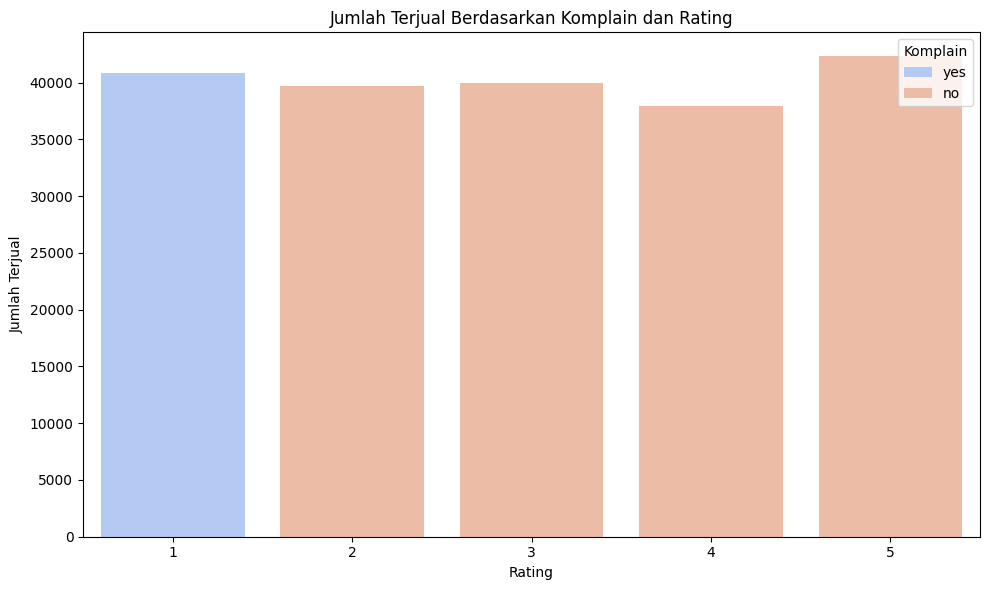

In [ ]:
# Grouping Data by Complaints and Ratings to Analyze Their Impact on Sales Volume
complain_rating_sales = df_dc.groupby(['Komplain', 'rating'])['jumlah_terjual'].sum().reset_index()

# Visualization of Sales Volume by Complaints and Ratings
plt.figure(figsize=(10, 6))
sns.barplot(data=complain_rating_sales, x='rating', y='jumlah_terjual', hue='Komplain', palette='coolwarm')
plt.title('Jumlah Terjual Berdasarkan Komplain dan Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Terjual')
plt.tight_layout()
plt.show()

**Insight:**
- Rating 5 has the highest sales volume, indicating that top-rated products are highly favored by customers.  
- Rating 1 shows a considerable number of sales despite having higher complaints.  
- Ratings 2 and 3 have similar sales volumes, both lower than ratings 5 and 1.  
- Although not poor in quality, products with a rating of 4 tend to have fewer sales, which may suggest that customers prefer either top-rated (5) products or lower-rated ones that are more affordable.  

## Purchasing Behavior Based on City and Product Type

This analysis examines product preferences by city, providing insights into differences in purchasing patterns across regions.

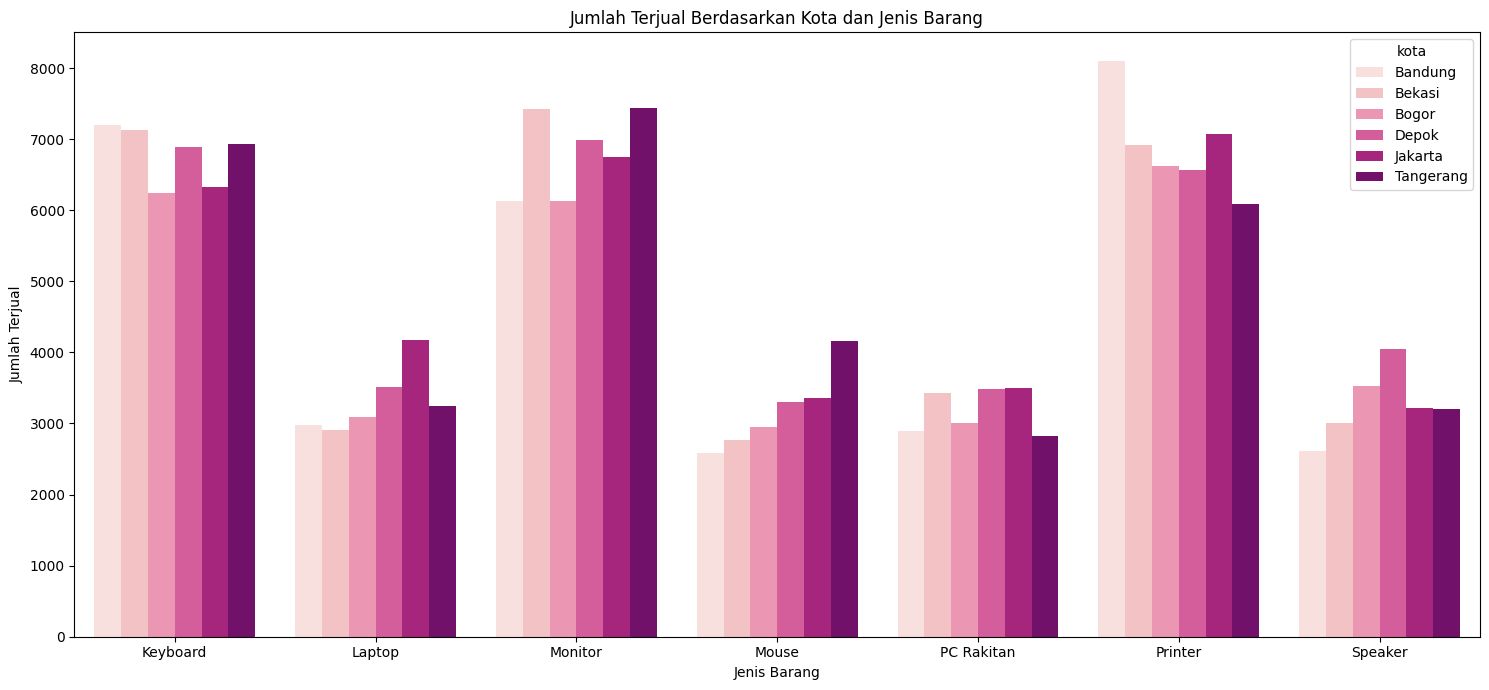

In [ ]:
# Grouping Data by City and Product Type to Analyze Sales Volume per City
city_product_sales = df_dc.groupby(['kota', 'jenis_barang'])['jumlah_terjual'].sum().reset_index()

# Visualization of Sales Volume by City and Product Type
plt.figure(figsize=(15, 7))
sns.barplot(data=city_product_sales, x='jenis_barang', y='jumlah_terjual', hue='kota', palette='RdPu')
plt.title('Jumlah Terjual Berdasarkan Kota dan Jenis Barang')
plt.xlabel('Jenis Barang')
plt.ylabel('Jumlah Terjual')
plt.tight_layout()
plt.show()

**Insight:**
- Jakarta has the highest sales for Laptops and Speakers.  
- Bandung shows the largest sales for Keyboards and Printers, indicating that computer products and office equipment are more popular in this city.  
- Bekasi and Tangerang have high sales for Monitors, which may reflect a greater need for devices used for work or entertainment requiring large screens.  
- Tangerang records high sales for Mice.  
- Depok, Bekasi, and Jakarta show significant interest in Custom-Built PCs, indicating demand for computers with specialized specifications in these cities.  


## Correlation Analysis (Heat Map)

To understand the relationships between variables, a correlation analysis was conducted using numerical data such as quantity sold, discount, unit price, cost, profit per item, total profit, and total revenue.

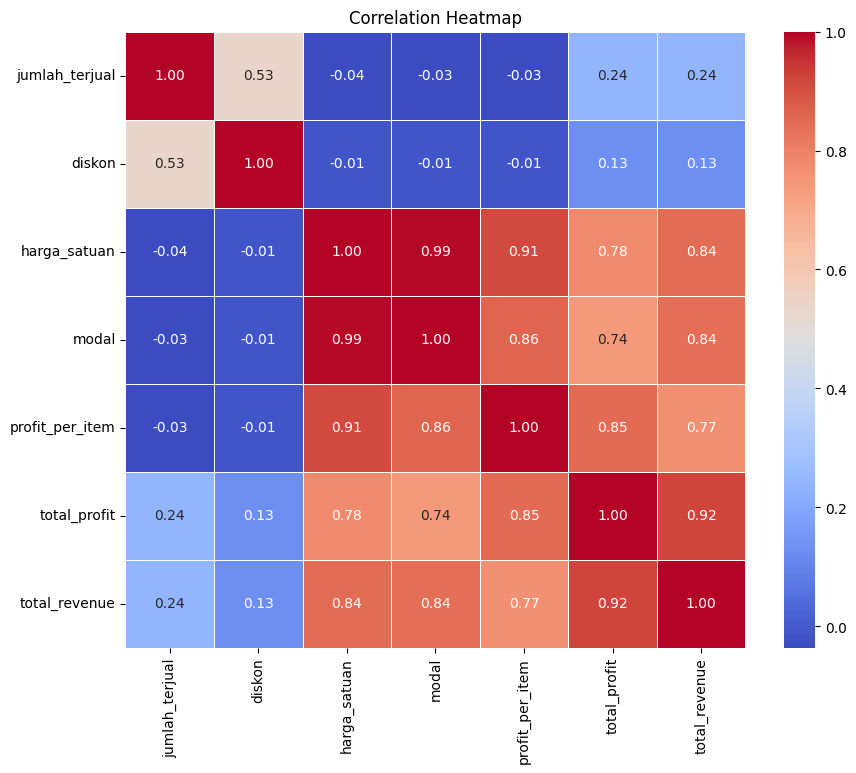

In [ ]:
numeric_columns = df_dc[['jumlah_terjual', 'diskon', 'harga_satuan', 'modal', 'profit_per_item', 'total_profit', 'total_revenue']]

# Plot Heatmap
corr = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Key Insights:**
1. **Unit price** (99%), **profit per item** (91%), **total profit** (78%), and **total revenue** (84%) show a significant correlation with **cost**.  
2. Although sales increase, large discounts can affect profit margins, explaining why some cities with high sales have low profits.  
3. Higher costs do not always correlate with higher profits. In Bogor, profits are lower despite higher costs, suggesting that fixed costs and operational expenses may be too high.  

## Jumlah Terjual Vs. Diskon

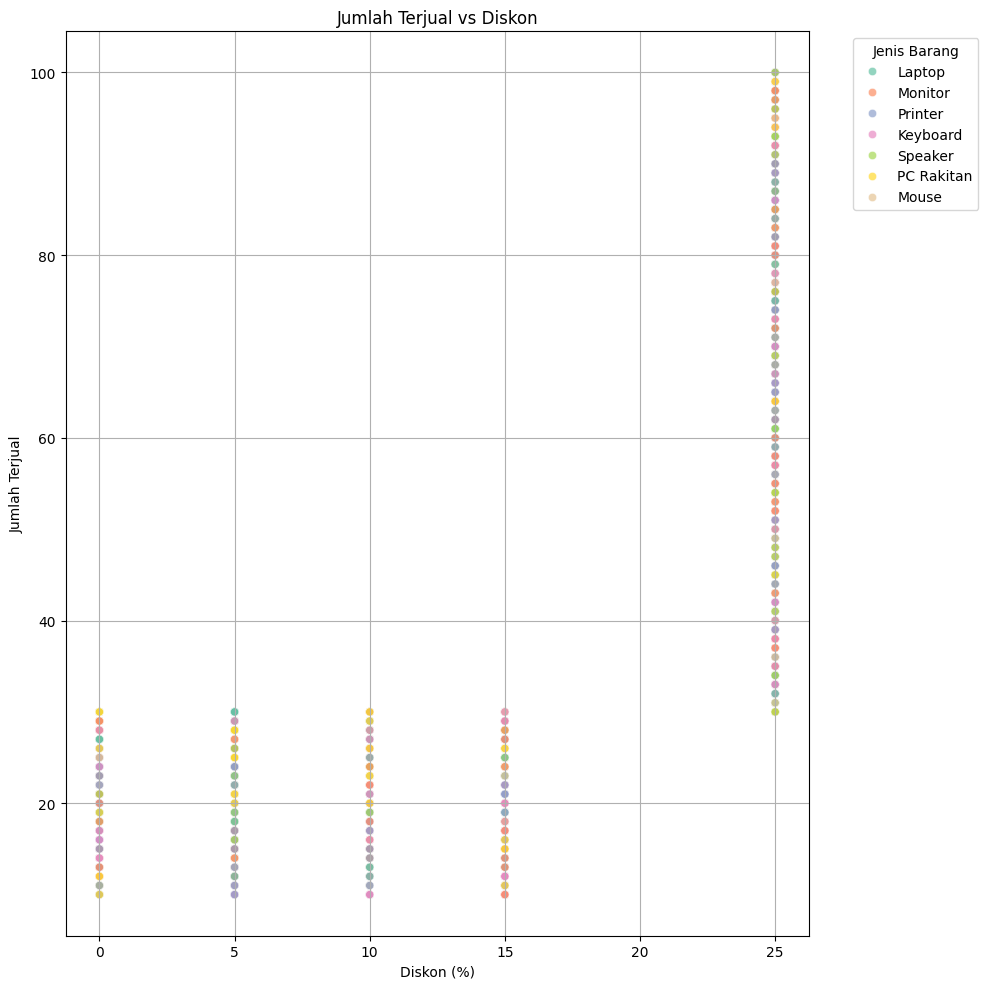

In [ ]:


plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_dc, x="diskon", y="jumlah_terjual", hue="jenis_barang", palette="Set2", alpha=0.7)
plt.title("Jumlah Terjual vs Diskon")
plt.xlabel("Diskon (%)")
plt.ylabel("Jumlah Terjual")
plt.grid(True)
plt.legend(title="Jenis Barang", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Insight

**Discounts Have a Strong Positive Effect**


*   There’s a clear upward jump in units sold at 25% discount, suggesting a threshold effect—customers respond most at a steep discount.
*   A significant cut (25%) drives bulk purchasing.

**Lower Discounts Don’t Move the Needle**


*   Between 0% and 15%, there's no major change in quantity sold.
*   This implies minor discounts are ineffective at boosting volume—possibly perceived as insignificant by customers.

**Consistency Across Product Types**


*   All jenis_barang seem to follow the same pattern: sales spike only at 25%
*   Indicates a universal price sensitivity, not limited to specific categories like speakers or laptops.

Feedback: Uji untuk kenaikan rata-rata penjualan "dibawah 25% dan diatas 25%

# Product Analysis

### Top 10 Products With The Highest Revenue and Profit

In [ ]:
# Revenue #
df_dc["revenue"] = df_dc["jumlah_terjual"] * df_dc["harga_satuan"]

In [ ]:
# Profit #
df_dc['profit'] = (df_dc['jumlah_terjual'] * df_dc['harga_satuan']) - df_dc['modal']

In [ ]:
# Product and Profit #
# Aggregate by Product #
products = df_dc.groupby('jenis_barang').agg({
    'total_revenue': 'sum',
    'total_profit' : 'sum'
}).reset_index()

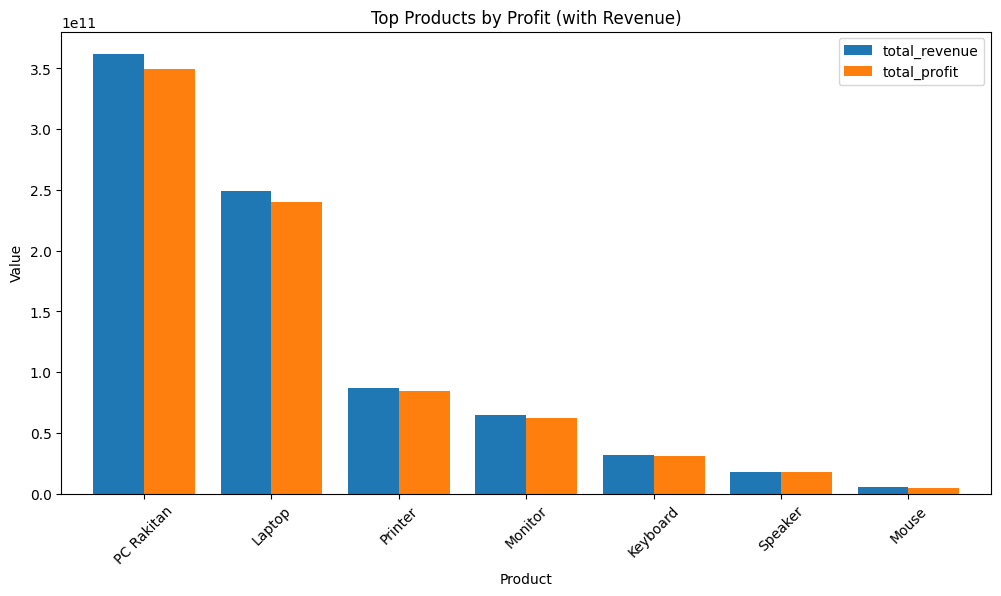

In [ ]:
top_products = df_dc.groupby("jenis_barang").agg(
    total_revenue=("revenue", "sum"),
    total_profit=("profit", "sum")
).sort_values("total_profit", ascending=False).head(10)

top_products.plot(
    kind="bar",
    figsize=(12,6),
    width=0.8
)

plt.title("Top Products by Profit (with Revenue)")
plt.ylabel("Value")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Insight**

- Custom-Built PCs dominate both revenue and profit.  
- Laptops rank second, though with a significant gap compared to Custom-Built PCs.  
- Printers and Monitors perform at a mid-tier level.  
- Keyboards, Speakers, and Mice are low contributors.  


## Top 10 Product That is Generating Negative Revenue and Profit

In [ ]:
# Products with negative profit #
loss_product = products[products["total_profit"] < 0]

In [ ]:
# Sort product by least profit #
top_loss = loss_product.sort_values("total_profit", ascending=True).head(10)
print(top_loss)

Empty DataFrame
Columns: [jenis_barang, total_revenue, total_profit]
Index: []


In [ ]:
# Set index for plotting
top_loss = top_loss.set_index("jenis_barang")

In [ ]:
# Plot
if not top_loss.empty:
    # Set index for plotting
    top_loss = top_loss.set_index("jenis_barang")

    # Plot
    top_loss[["total_revenue", "total_profit"]].plot(
        kind="bar", figsize=(12,6),
        title="Top 10 Loss-Making Products (Negative Profit)"
    )

    plt.ylabel("Value")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("No products with negative profit found.")

No products with negative profit found.


## Cities That Generate Most Revenue and Profit

In [ ]:
# Check Cities #
df_dc['kota'].unique()

array(['Bogor', 'Tangerang', 'Depok', 'Bekasi', 'Jakarta', 'Bandung'],
      dtype=object)

In [ ]:
# Mapping the Cities #
jabodetabekban = ['Bogor', 'Tangerang', 'Depok', 'Bekasi',  'Jakarta', 'Bandung']

In [ ]:
# Group by kota for revenue and profit #
city_stats = df_dc.groupby("kota")[["total_revenue", "total_profit"]].sum().sort_values("total_revenue", ascending=False)

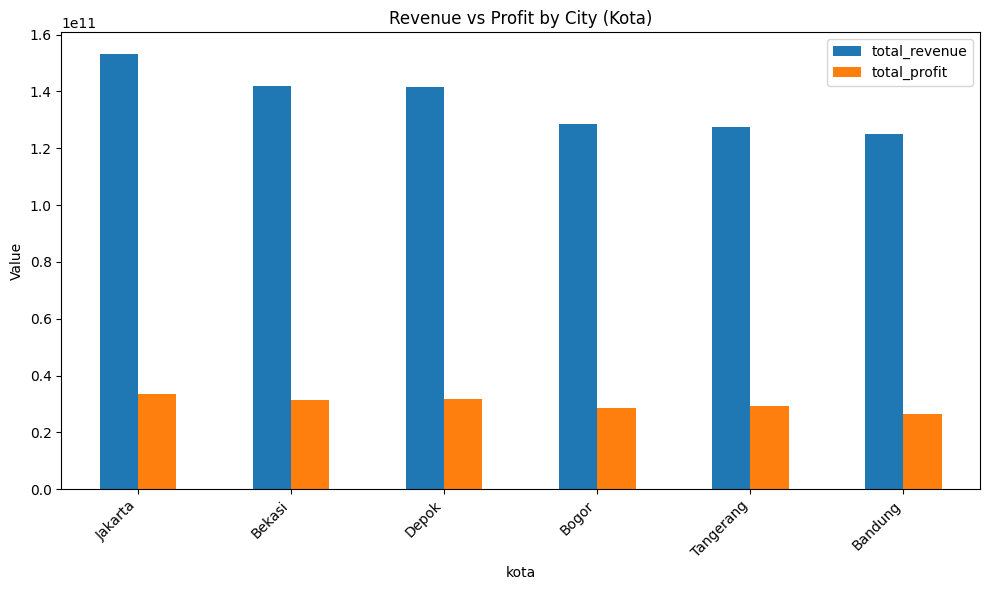

In [ ]:
# Plot #
ax = city_stats.plot(
    kind="bar", figsize=(10,6),
    title="Revenue vs Profit by City (Kota)"
)

plt.ylabel("Value")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**INSIGHT**

- Jakarta dominates both revenue and profit
- Bekasi and Depok are the second tier
- Bogor and Tangerang are mid-performers
- Bandung underperforms

## Inferential Statistical Test to examine the difference in profit across cities?  

**Test:** Kruskal-Wallis  
- H0: The average profit per transaction is the same for all cities.  
- H1: There is a difference in average profit in at least one city.  

In [ ]:
city_stats_median = df_dc.groupby("kota")[["total_profit"]].median().sort_values("total_profit", ascending=False)
city_stats_median = city_stats_median['total_profit'].rename('profit_median')
city_stats_median

,profit_median
kota,
Bekasi,7498569.0
Jakarta,7315743.0
Depok,7048764.0
Bogor,7008576.0
Bandung,6951774.0
Tangerang,6457200.0


In [ ]:
from scipy.stats import kruskal

# Split profits into groups by city
total_profit_city = [group["total_profit"].values for _, group in df_dc.groupby("kota")]

# Kruskal-Wallis test
stat, p = kruskal(*total_profit_city)

print("Kruskal-Wallis H-statistic:", stat)
print("p-value:", p)

# Interpretation
if p > 0.05:
    print("Take H0.")
else:
    print("Take H1")

Kruskal-Wallis H-statistic: 13.220021844112306
p-value: 0.02140189371762691
Take H1


**Conclusion**

H₁: There is a difference in average profit in at least one city.  

# Seasonal Analysis

## Sales Revenue Analysis by Month and Quarter

In [ ]:
df_dc['bulan'] = df_dc['tanggal_bon'].dt.month
df_dc['kuartal'] = df_dc['tanggal_bon'].dt.to_period('Q')

In [ ]:
quarterly_sales = df_dc.groupby('kuartal')['total_revenue'].sum()

In [ ]:
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales['total_revenue'] = quarterly_sales['total_revenue'].astype(int)
quarterly_sales.sort_values('total_revenue', ascending = False)

,kuartal,total_revenue
15,2024Q4,119774350000
12,2024Q1,87834450000
16,2025Q1,86379225000
13,2024Q2,85798875000
17,2025Q2,82766550000
14,2024Q3,76062775000
11,2023Q4,53825350000
8,2023Q1,39025800000
9,2023Q2,38675525000
10,2023Q3,32893025000


### Quarter

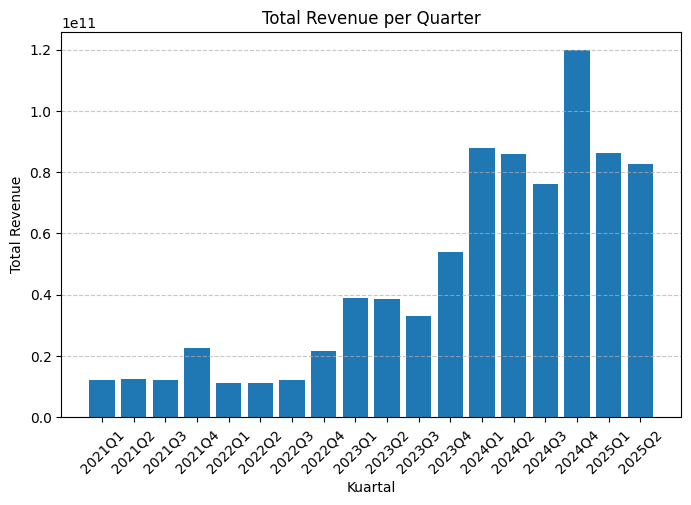

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(quarterly_sales['kuartal'].astype(str), quarterly_sales['total_revenue'])
plt.title("Total Revenue per Quarter")
plt.xlabel("Kuartal")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insights:**

1. Total revenue appears stable from **Q1-2021** to **Q3-2022**, but starting in **Q4-2022**, total revenue increased dramatically.  

2. Total revenue in **Q4** of each year is consistently higher compared to **Q1–Q3** of the same year.  

3. **Q4-2024** marks the highest sales quarter compared to Q4 in other years.  

In [ ]:
monthly_sales = df_dc.groupby('bulan')['total_revenue'].sum().reset_index()

In [ ]:
monthly_sales = monthly_sales.reset_index(drop=True)

monthly_sales['total_revenue'] = monthly_sales['total_revenue'].astype(int)
monthly_sales.sort_values('total_revenue', ascending = False)

,bulan,total_revenue
11,12,132411975000
1,2,89206300000
4,5,79685875000
3,4,78379875000
2,3,75165650000
5,6,72621300000
0,1,72201925000
6,7,48463050000
10,11,45281000000
8,9,44048600000


### Month

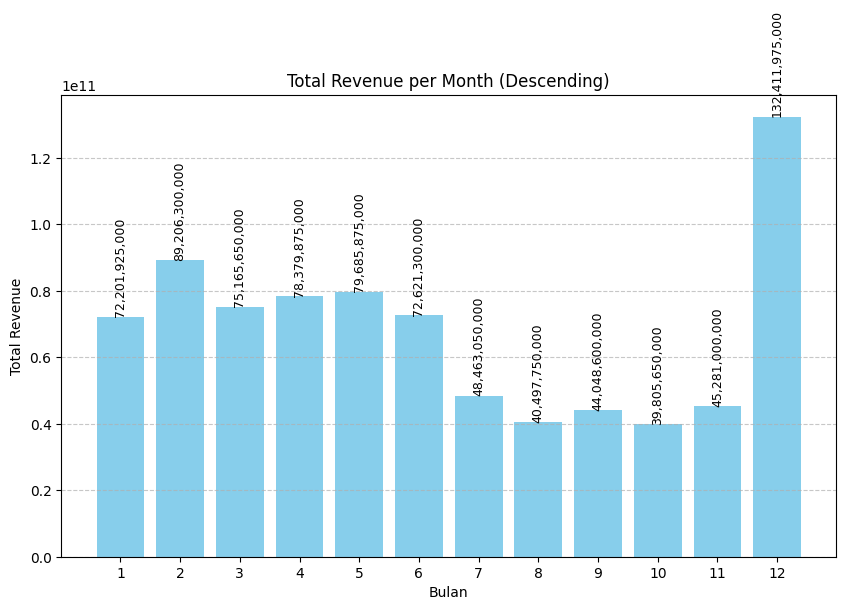

In [ ]:
# Sort descending
monthly_sorted = monthly_sales.sort_values('total_revenue', ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(monthly_sorted['bulan'], monthly_sorted['total_revenue'], color='skyblue')

# Add label
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,}",
             ha='center', va='bottom', fontsize=9, rotation=90)

plt.title("Total Revenue per Month (Descending)")
plt.xlabel("Bulan")
plt.ylabel("Total Revenue")
plt.xticks(monthly_sorted['bulan'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insights:**

1. Although Q4 is always the largest contributor to total revenue, **months 9, 10, and 11 are the lowest revenue contributors** compared to other months.  

2. **Month 12** contributes the majority of Q4’s total revenue, making Q4 the quarter with the highest total revenue compared to other quarters.  

## Sales Profit Analysis by Month and Quarter

In [ ]:
# Groupby month for total_profit
monthly_profit = df_dc.groupby('bulan')['total_profit'].sum().reset_index(drop=True)


monthly_profit = df_dc.groupby('bulan')['total_profit'].sum().reset_index()

# Convert to int
monthly_profit['total_profit'] = monthly_profit['total_profit'].astype(int)

# Sort by profit descending
monthly_profit = monthly_profit.sort_values('total_profit', ascending=False)

monthly_profit

### Month

In [ ]:
plt.figure(figsize=(10,6))
bars = plt.bar(monthly_profit['bulan'], monthly_profit['total_profit'], color='skyblue')

# Add label
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,}",
             ha='center', va='bottom', fontsize=9, rotation=90)

plt.title("Total Profit per Month")
plt.xlabel("Bulan")
plt.ylabel("Total Profit")
plt.xticks(range(1,13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insights:**

The distribution of total profit per month is exactly the same as total revenue per month; therefore, the conclusions for total profit per month are the same.  

In [ ]:
# Groupby quarter
quarterly_profit = df_dc.groupby('kuartal')['total_profit'].sum()

# Reset index
quarterly_profit = quarterly_profit.reset_index()

# Change format to int
quarterly_profit['total_profit'] = quarterly_profit['total_profit'].astype(int)

# Sort by profit descending
quarterly_profit = quarterly_profit.sort_values('total_profit', ascending=False)

quarterly_profit


### Quarter

In [ ]:
# Sort by kuartal (quartal)
qp_sorted = quarterly_profit.sort_values('kuartal')

plt.figure(figsize=(8,5))
plt.bar(qp_sorted['kuartal'].astype(str), qp_sorted['total_profit'])
plt.title("Total Profit per Quarter")
plt.xlabel("Kuartal")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insights:**

The distribution of total profit per quarter is exactly the same as total revenue per quarter; therefore, the conclusions for total profit per quarter are the same.  

## Comparison of Average Total Revenue per Quarter and Month

In [ ]:
# Calculate the Average Total Revenue per Quarter
quarterly_revenue_mean = (
    df_dc.groupby('kuartal')['total_revenue']
         .mean()
         .reset_index()
)

# Convert Numbers to Integers for Cleaner Display
quarterly_revenue_mean['total_revenue'] = quarterly_revenue_mean['total_revenue'].astype(int)

### Quarter

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(quarterly_revenue_mean['kuartal'].astype(str), quarterly_revenue_mean['total_revenue'], color='skyblue')

# Add Number Labels Above the Bars
for i, v in enumerate(quarterly_revenue_mean['total_revenue']):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom', fontsize=9, rotation=90)

plt.title("Median Total Revenue per Kuartal")
plt.xlabel("Kuartal")
plt.ylabel("Mean Total Revenue")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insights:**

The distribution of median profit per quarter is exactly the same as total revenue per quarter; therefore, the conclusions for median profit per quarter are the same.  

In [ ]:
# Median Total Revenue per Month
monthly_sales_median = (
    df_dc.groupby('bulan')['total_revenue']
         .median()
         .reset_index()
)

# Convert for Cleaner Display
monthly_sales_median['total_revenue'] = monthly_sales_median['total_revenue'].astype(int)

print(monthly_sales_median)

### Month

In [ ]:
# Sort descending
monthly_sorted = monthly_sales_median.sort_values('total_revenue', ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(monthly_sorted['bulan'], monthly_sorted['total_revenue'], color='skyblue')

# Add label
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,}",
             ha='center', va='bottom', fontsize=9, rotation=90)

plt.title("Median Revenue per Month (Descending)")
plt.xlabel("Bulan")
plt.ylabel("Median Revenue")
plt.xticks(monthly_sorted['bulan'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insights:**

The distribution of median profit per month is exactly the same as total revenue per month; therefore, the conclusions for median profit per month are the same.  

## Inferential Statistical Test to Examine Median Differences Across Quarters

H0: The average total revenue is the same across all quarters.  

H1: There is at least one quarter with a significantly different average.  

In [ ]:
from scipy.stats import kruskal

# Get data from revenue per quarter
groups_quarter = [g['total_revenue'].values for _, g in df_dc.groupby('kuartal')]

# Kruskall Wallis test
h_stat, p_val = kruskal(*groups_quarter)
print(f"Kruskal-Wallis H = {h_stat:.4f}, p-value = {p_val:.4f}")

**Insights:**

p-value < 0.05; at least one quarter shows a significant difference.  

## Inferential Statistical Test to Examine Median Differences Across Months

H2: The average total revenue is the same across all months.  

H1: There is at least one month with a significantly different average.  

In [ ]:
groups_month = [g['total_revenue'].values for _, g in df_dc.groupby('bulan')]

# uji Kruskal–Wallis
h_stat, p_val = kruskal(*groups_month)
print(f"Kruskal-Wallis H = {h_stat:.4f}, p-value = {p_val:.4f}")

**Insights:**

p-value < 0.05; at least one month shows a significant difference.  

# Discount Analysis

## Discounts on Sales by Brand

In [ ]:
# Top 5 brand
top_n = df_dc.groupby('merek_barang')['jumlah_terjual'].sum().nlargest(5).index
filtered = df_dc[df_dc['merek_barang'].isin(top_n)]

plt.figure(figsize=(12,6))
sns.boxplot(data=filtered, x='diskon', y='jumlah_terjual', hue='merek_barang', palette='viridis')
plt.title('Diskon Terhadap Jumlah Terjual Berdasarkan Merek')
plt.xlabel('Diskon')
plt.ylabel('Jumlah Terjual')
plt.legend(title='Merek Barang', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insight:**
- A 25% discount drives significant sales, particularly for Panasonic and Epson.  
- From no discount up to a 15% discount, the distribution appears similar.  

## Discounts on Sales by Brand (Median)

In [ ]:
median_per_brand = (
    filtered.groupby(['merek_barang', 'diskon'])['jumlah_terjual']
            .median()
            .reset_index()
)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=median_per_brand, x='merek_barang', y='jumlah_terjual', hue='diskon', palette='Set2')

plt.title("Median Jumlah Terjual per Merek (per Level Diskon)")
plt.xlabel("Merek Barang")
plt.ylabel("Median Jumlah Terjual")
plt.legend(title="Diskon (%)", bbox_to_anchor=(1.05,1), loc='upper left')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Inferential Statistical Test to Examine Median Sales Differences by Brand

H0: The distribution (median) of units sold is the same across discount levels.  

H1: There is a significant difference in the distribution across discount levels.  

In [ ]:
# Loop for all brand in the Top 5
for merek in filtered['merek_barang'].unique():
    data_merek = filtered[filtered['merek_barang'] == merek]

    # Groupby jumlah_terjual by discount
    groups = [g['jumlah_terjual'].values for _, g in data_merek.groupby('diskon')]

    # Kruskal–Wallis test
    h_stat, p_val = kruskal(*groups)
    print(f"[{merek}] H = {h_stat:.4f}, p-value = {p_val:.4f}")

**Insights:**

p-value < 0.05; There is a significant difference in distribution across discount levels for at least two brands.  

# All Insights

# Conclusions and Recommendations

## Conclusion

### 1. Overall Sales & Profit

**Sales and Profit Performance:**  
Sales showed a significant surge in 2023 and early 2024, but profitability did not align with the increase in sales. Although total revenue rose sharply, profit declined in mid-2024, indicating issues with profit margins. This suggests that while sales volume is high, there is a need for strategies to improve more sustainable profitability.  

**Sustainable Revenue Growth:**  
The profit fluctuations in 2024 indicate that despite the surge in sales, revenue growth was not consistent. Factors such as product pricing, suboptimal discount management, and reliance on low-margin products potentially hinder sustainable growth.  

---

### 2. Customer Behavior

**Most Profitable Customer Segments:**  
High-margin products, such as Custom-Built PCs and Laptops, are more frequently purchased by men, while lower-margin products like Keyboards, Monitors, and Mice are more often purchased by women. Millennials are the most profitable segment as their purchase volume is higher compared to Gen Z and Gen X.  

**Behavioral Differences Across Segments:**  

- **Gender:** Women tend to purchase lower-margin products, whereas men are more likely to buy premium products with higher margins.  
- **Generation:** Millennials show higher purchase volumes compared to Gen Z, reflecting broader purchasing preferences.  
- **Geography:** Product preferences also vary significantly by city. For example, in Jakarta, Laptops and Speakers are more popular, while in Bandung, Monitors and Printers are more favored.  

## Recommendations

### Top Priorities

1. Improve Profitability Through Margin-Based Pricing  
Company profitability depends on the ability to increase margins on more profitable products. Without adjustments in pricing and better margin management, the company will not be able to sustain long-term growth.  
**Why:**  
Products such as Custom-Built PCs and Laptops deliver higher margins, enabling the company to improve profitability without needing to increase sales volume.  

   **Action:**  
   - **Price Range:** Set premium pricing for products like Custom-Built PCs and Laptops, e.g., between IDR 10 million to IDR 15 million, depending on specifications and target markets.  
   - **Sales Strategy:** Use bundling strategies or targeted discounts for low-margin products (such as Keyboards and Monitors) to drive volume without harming profit margins.  

   **Rationale:**  
   By increasing profit margins from premium products, the company can strengthen profitability without relying on high sales volumes from low-margin products.  

---

2. Optimize Discount Management to Improve Profitability  
Excessive discounts can significantly erode profits, especially for low-margin products. More careful discount management is therefore critical to improving short-term profitability.  
**Why:**  
Analysis shows that large discounts can reduce profitability, particularly for high-priced and low-margin products. Thus, discounts must be applied more strategically.  

   **Action:**  
   - **Discount Range:** Use smaller discounts (max 10–15%) on premium products and larger discounts (15–25%) on lower-margin items.  
   - **Targeted Discounts:** Apply targeted discounts for products with seasonal demand (e.g., Monitors and Printers), while offering smaller or no discounts on premium products like Laptops.  

   **Rationale:**  
   With more controlled discounts, the company can increase sales volume of low-margin products without undermining overall profitability from premium items.  

---

### Additional Steps (Next Phase)

3. Market Segmentation by Demographics  
While sharper segmentation is useful for driving sales, it is not as urgent as margin and discount management. This step helps strengthen marketing strategies and has more impact in the medium term.  
**Why:**  
Purchasing behavior analysis shows significant differences across Millennials, Gen Z, and men vs. women, creating opportunities to tailor marketing strategies more effectively.  

   **Action:**  
   - **Target Millennials and Gen Z:** Focus campaigns on Millennials and Gen Z by highlighting premium products (Laptops and Custom-Built PCs) via digital platforms they frequent.  
   - **Gender Segmentation:** For women, promote low-margin products with bundling discounts or package deals (e.g., Monitors and Printers).  

   **Rationale:**  
   By tailoring offerings to customer segments, the company can increase conversion rates and ensure marketing strategies are more effective and relevant.  

---

4. Optimize Marketing Strategies by Geographic Location  
This focuses on regional optimization, improving distribution efficiency and product relevance. It becomes more effective once profitability issues are addressed.  
**Why:**  
Analysis shows significant regional differences in product preferences, meaning the company must adjust strategies by geography to increase product relevance.  

   **Action:**  
   - **Target Regions:** Focus marketing efforts in Jakarta, Depok, and Bekasi for products like Laptops, Speakers, and Custom-Built PCs, which show high demand in these areas.  
   - **Regional Sales Strategy:** Adjust promotions and pricing by city, e.g., offer special discounts in Jakarta or product bundling in Bandung for locally popular products.  

   **Rationale:**  
   Understanding regional preferences allows for more focused strategies, reduced distribution costs, and greater product relevance for customers.  

---

5. Improve Inventory Management Based on Seasonality and Buying Trends  
Better stock management is an operational step that helps avoid shortages or excess inventory during seasonal peaks. While important for efficiency, its impact on profitability is less direct.  
**Why:**  
Product sales tend to follow seasonal trends, presenting opportunities to boost sales through improved inventory planning.  

   **Action:**  
   - **Monitor Seasonal Trends:** Use historical sales data to project demand surges and adjust stock levels and promotions accordingly.  
   - **Adjust Inventory:** Increase stock of products like Laptops and Custom-Built PCs during back-to-school seasons or major shopping periods.  

   **Rationale:**  
   By aligning inventory with seasonal trends, the company can ensure popular products remain available and avoid stockouts during critical periods.  
